In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

EDP = pd.read_excel("C:/Users/gusta/Desktop/DNC/Learn_python/Dataset_colabs/clients_renamed.xlsx")
EDP

,Unnamed: 0,ID,valor_credito,Gênero,EDUCATION,MARRIAGE,AGE,status_pag_set,status_pag_ago,status_pag_ago.1,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,valor_pag_set,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0,1,20000,2,2,1,24,2,2,-1,...,689,0,0,0,0,689,0,0,0,0
1,1,2,120000,2,2,2,26,-1,2,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,2,3,90000,2,2,2,34,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,3,4,50000,2,2,1,37,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,4,5,50000,1,2,1,57,-1,0,-1,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,29996,220000,1,3,1,39,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,29996,29997,150000,1,3,2,43,-1,-1,-1,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,29997,29998,30000,1,2,2,37,4,3,2,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,29998,29999,80000,1,3,1,41,1,-1,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [26]:
EDP_group = EDP.groupby(["EDUCATION"]).mean().reset_index()
for col in EDP_group.columns:
    print(col)

EDUCATION
Unnamed: 0
ID
valor_credito
Gênero
MARRIAGE
AGE
status_pag_set
status_pag_ago
status_pag_ago.1
PAY_4
PAY_5
PAY_6
estrato_set
BILL_AMT2
BILL_AMT3
BILL_AMT4
BILL_AMT5
BILL_AMT6
valor_pag_set
PAY_AMT2
PAY_AMT3
PAY_AMT4
PAY_AMT5
PAY_AMT6


Text(0.5, 1.0, 'MEAN CREDIT TABLE')

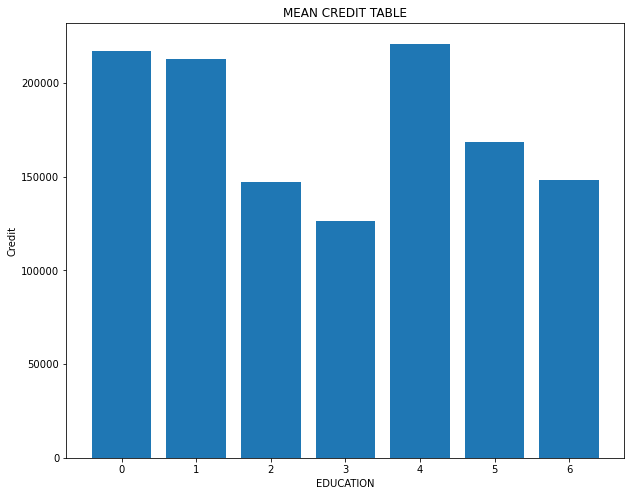

In [22]:
#grafico
#media do valor de credito concedido

plt.figure(figsize=(10,8))
plt.bar(EDP_group["EDUCATION"], EDP_group["valor_credito"])
plt.xlabel("EDUCATION")
plt.ylabel("Credit")
plt.title("MEAN CREDIT TABLE")


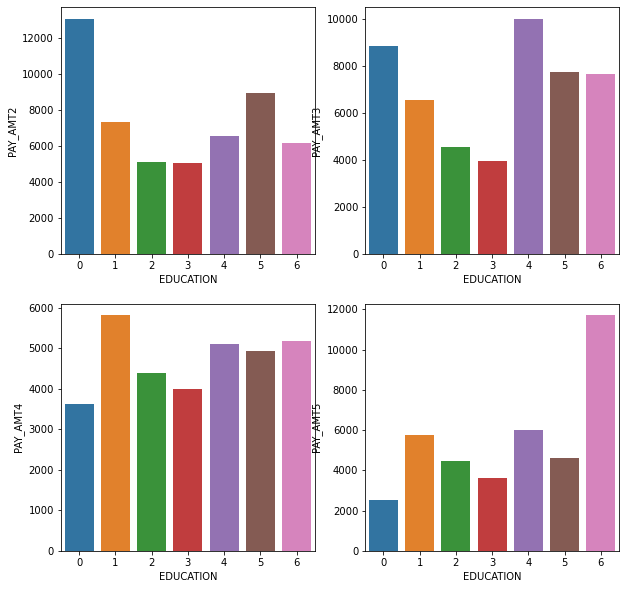

In [29]:
#SEABORN
# extrato bancario clientes segundo nivel de escolaridade 4 meses

fig, axes = plt.subplots(2,2,figsize=(10,10))
sns.barplot(data=EDP_group, x = "EDUCATION", y = "PAY_AMT2", ax=axes[0,0]);
sns.barplot(data=EDP_group, x = "EDUCATION", y = "PAY_AMT3", ax=axes[0,1]);
sns.barplot(data=EDP_group, x = "EDUCATION", y = "PAY_AMT4", ax=axes[1,0]);
sns.barplot(data=EDP_group, x = "EDUCATION", y = "PAY_AMT5", ax=axes[1,1]);

In [39]:
#Plotly
fig = go.Figure()

fig.add_trace(go.Bar(x=EDP_group['EDUCATION'],
                     y=EDP_group['PAY_AMT2'],
                     marker_color='Red',
                     name="valor pago 04/2005"
                    ))

fig.add_trace(go.Bar(x=EDP_group['EDUCATION'],
                     y=EDP_group['PAY_AMT3'],
                     marker_color='Blue',
                     name="valor pago 05/2005"
                    ))

fig.add_trace(go.Bar(x=EDP_group['EDUCATION'],
                     y=EDP_group['PAY_AMT4'],
                     marker_color='Green',
                     name="valor pago 06/2005"
                    ))

fig.add_trace(go.Bar(x=EDP_group['EDUCATION'],
                     y=EDP_group['PAY_AMT5'],
                     marker_color='Brown',
                     name="valor pago 07/2005"
                    ))

fig.update_layout(yaxis=dict(title="Payment value 2005",
                             titlefont_size=14,
                             tickfont_size=10),
                  xaxis=dict(title="EDUCATION",
                             titlefont_size=14,
                             tickfont_size=10         
                            ))


In [41]:
#SALVANDO

fig.write_html("C:/Users/gusta/Desktop/DNC/Learn_python/Dataset_colabs/Education_payment.html")